You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [46]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn.naive_bayes import GaussianNB

**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.


In [47]:
# reading the CSV file into pandas dataframe
df= pd.read_excel(r"C:\Users\Mathesh R\Downloads\Election_Data.xlsx",sheet_name='Election_Dataset_Two Classes',usecols = [i for i in range(1,10)]) 


In [58]:
df.shape

(1525, 9)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [24]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [3]:
df[df.duplicated(keep=False)].reset_index()

,index,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,2,Labour,35,4,4,5,2,3,2,male
1,67,Labour,35,4,4,5,2,3,2,male
2,86,Conservative,53,3,4,2,2,6,0,female
3,333,Labour,38,2,4,2,2,4,3,male
4,390,Labour,39,3,4,4,2,5,2,male
5,577,Conservative,74,4,3,2,4,8,2,female
6,626,Labour,39,3,4,4,2,5,2,male
7,870,Labour,38,2,4,2,2,4,3,male
8,916,Labour,29,4,4,4,2,2,2,female
9,983,Conservative,74,4,3,2,4,8,2,female


In [3]:
df.duplicated().sum()

8

In [48]:
df.drop_duplicates(inplace=True)

In [4]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541
std,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [35]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [5]:
df.skew()

C:\Users\Mathesh R\AppData\Local\Temp\ipykernel_29156\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

In [ ]:
Coverting numeric into 

In [49]:
cat=['economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']

In [50]:
for i in cat:
    df[i]=df[i].astype("object")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   object
 3   economic.cond.household  1517 non-null   object
 4   Blair                    1517 non-null   object
 5   Hague                    1517 non-null   object
 6   Europe                   1517 non-null   object
 7   political.knowledge      1517 non-null   object
 8   gender                   1517 non-null   object
dtypes: int64(1), object(8)
memory usage: 118.5+ KB


In [41]:
df.describe()

,age
count,1517.000000
mean,54.241266
std,15.701741
min,24.000000
25%,41.000000
50%,53.000000
75%,67.000000
max,93.000000


C:\Users\Mathesh R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

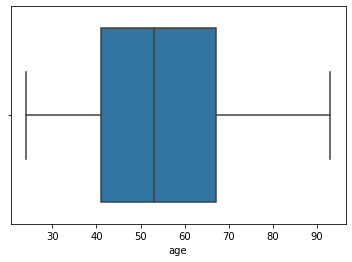

In [44]:
sns.boxplot(df['age'])

In [5]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64


EUROPE :  11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [ ]:
age

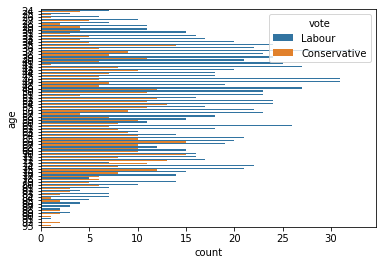

In [16]:

fig.set_size_inches(20,20)
sns.countplot(data=df,y='age',hue='vote')
plt.xticks(rotation=0)
plt.show()

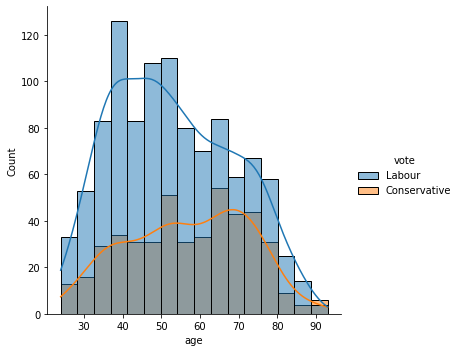

In [21]:
fig.set_size_inches(20,20)
sns.displot(data=df,x='age',hue='vote', kde=True)
plt.show()

In [7]:
 print(df['vote'].value_counts(normalize=True).sort_values())

Conservative    0.302951
Labour          0.697049
Name: vote, dtype: float64


In [ ]:
economic condition-national

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

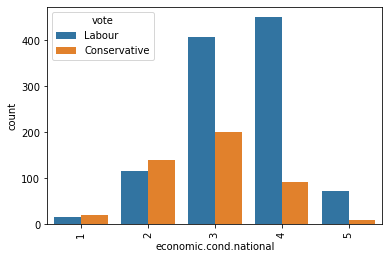

In [10]:
sns.countplot(data=df,x='economic.cond.national',hue='vote')
plt.xticks(rotation=90)

In [ ]:
economic condition-household

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

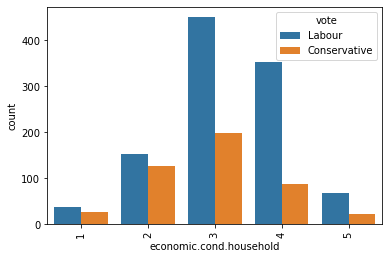

In [16]:
g=sns.countplot(data=df,x='economic.cond.household',hue='vote')
plt.xticks(rotation=90)

In [ ]:
blair

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

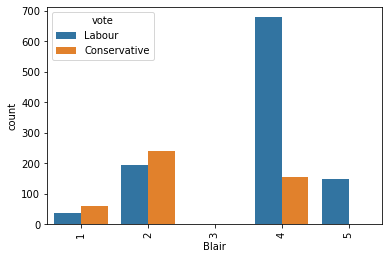

In [18]:
sns.countplot(data=df,x='Blair',hue='vote')
plt.xticks(rotation=90)

In [ ]:
Hague

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

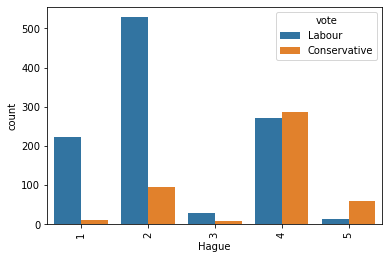

In [19]:
sns.countplot(data=df,x='Hague',hue='vote')
plt.xticks(rotation=90)

In [ ]:
EUROPE :  11

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11')])

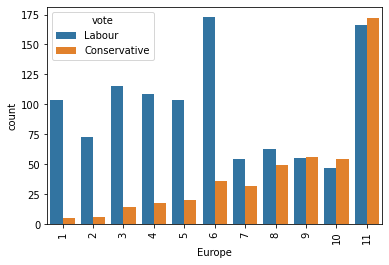

In [20]:
sns.countplot(data=df,x='Europe',hue='vote')
plt.xticks(rotation=90)

In [10]:
 print(df['political.knowledge'].value_counts(normalize=True).sort_values())

1    0.025049
3    0.164140
0    0.299275
2    0.511536
Name: political.knowledge, dtype: float64


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

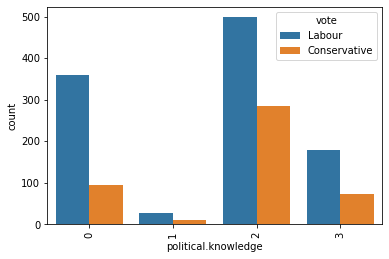

In [23]:
sns.countplot(data=df,x='political.knowledge',hue='vote')
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

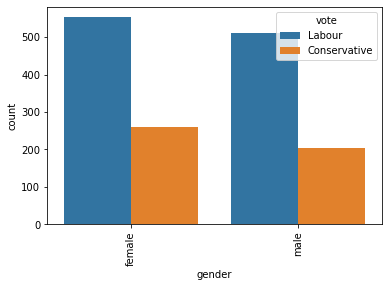

In [24]:
sns.countplot(data=df,x='gender',hue='vote')
plt.xticks(rotation=90)

In [9]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['age'],hue='ender', jitter=True) 
plt.show()

ValueError: Could not interpret input 'Gender'

<Figure size 576x360 with 0 Axes>

C:\Users\Mathesh R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote', ylabel='age'>

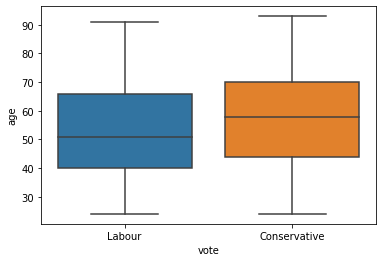

In [48]:
sns.boxplot(df["vote"],df['age'])

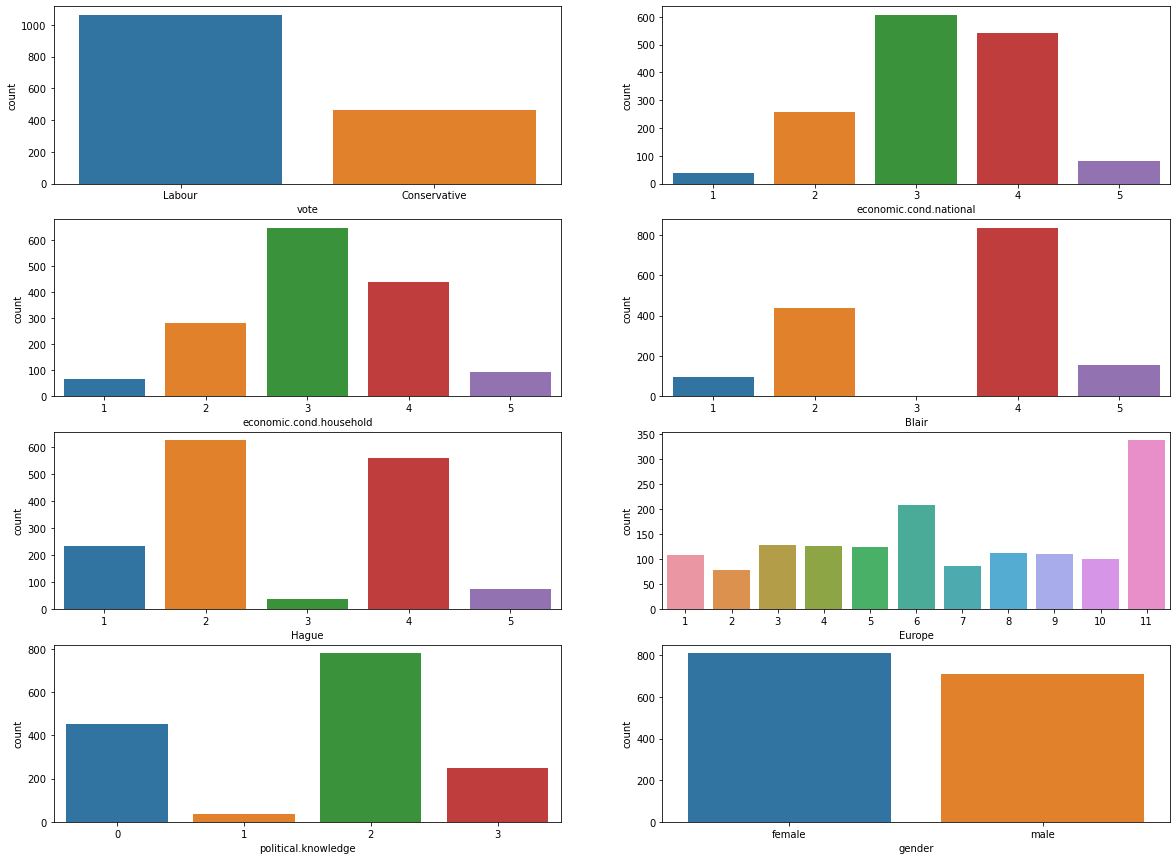

In [22]:
fig, axes = plt.subplots(4,2)
fig.set_size_inches(20,15)
sns.countplot(x='vote', data=df, ax=axes[0][0])
sns.countplot(x='economic.cond.national', data=df, ax=axes[0][1])
sns.countplot(x='economic.cond.household', data=df, ax=axes[1][0])
sns.countplot(x='Blair', data=df, ax=axes[1][1])
sns.countplot(x='Hague', data=df, ax=axes[2][0])
sns.countplot(x='Europe', data=df, ax=axes[2][1])
sns.countplot(x='political.knowledge', data=df, ax=axes[3][0])
sns.countplot(x='gender', data=df, ax=axes[3][1])
plt.show()

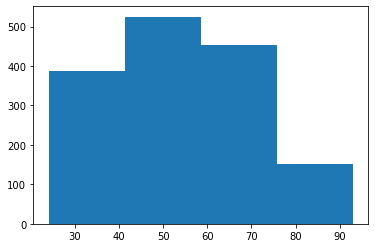

In [54]:
import matplotlib.pyplot as plt
mpgs = df['age']
plt.hist(mpgs, bins=4)
plt.show()

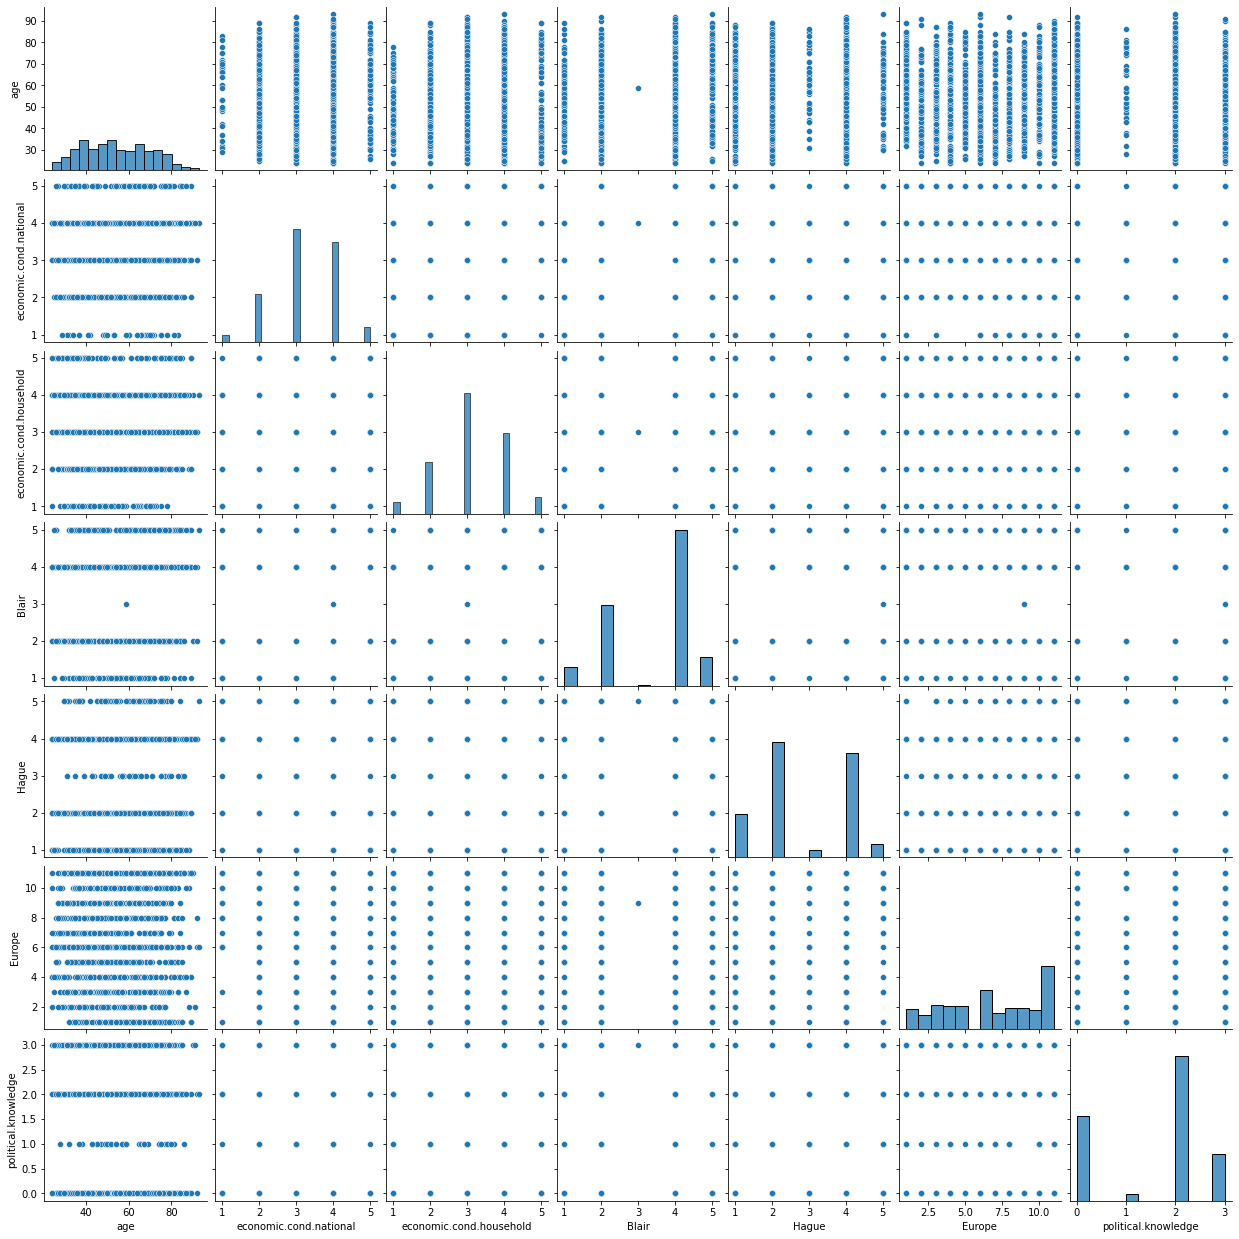

In [4]:
sns.pairplot(df)

In [5]:
corr = df.corr(method='pearson')

C:\Users\Mathesh R\AppData\Local\Temp\ipykernel_18952\3421424599.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


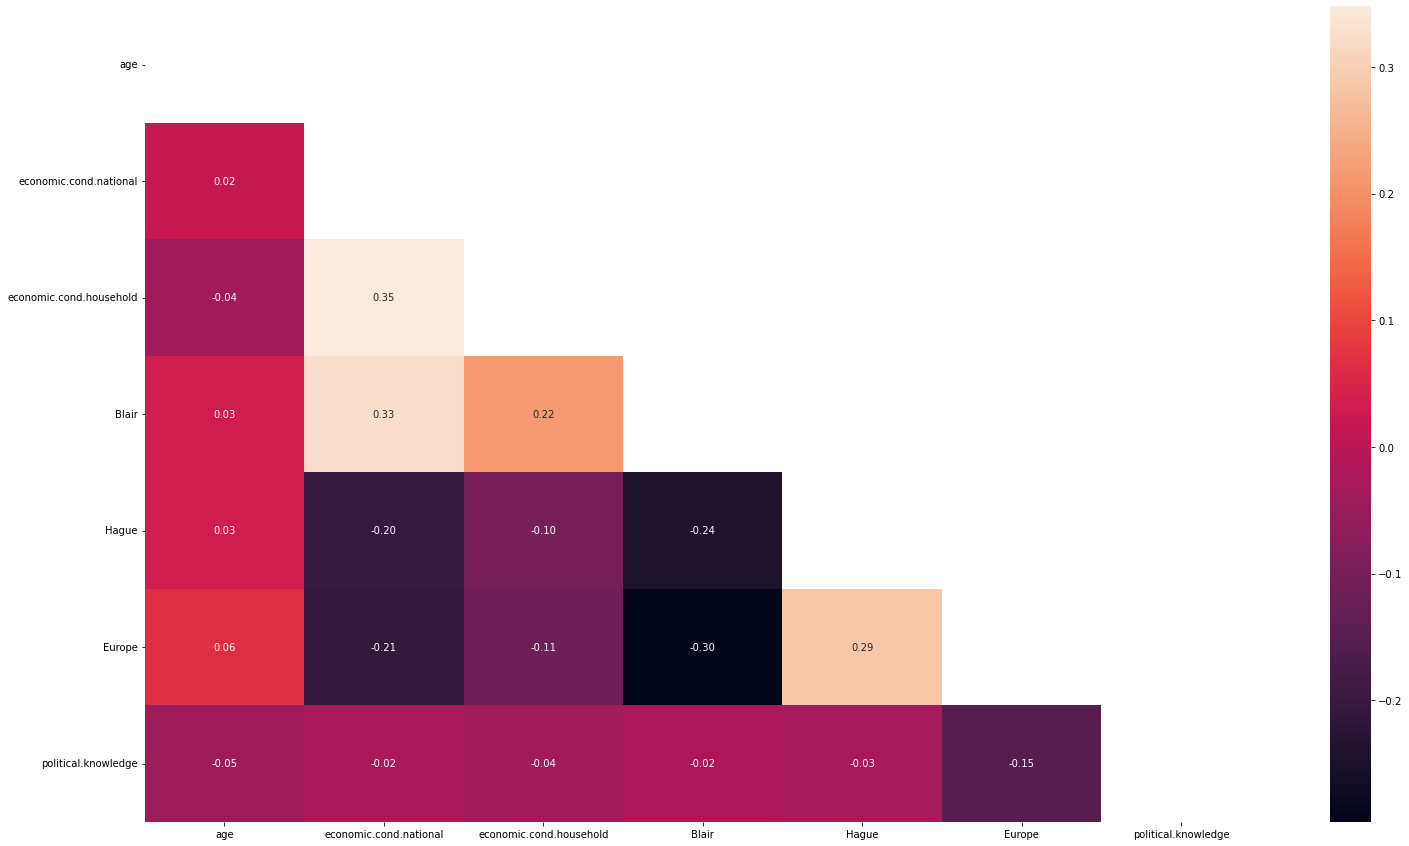

In [6]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   object
 3   economic.cond.household  1517 non-null   object
 4   Blair                    1517 non-null   object
 5   Hague                    1517 non-null   object
 6   Europe                   1517 non-null   object
 7   political.knowledge      1517 non-null   object
 8   gender                   1517 non-null   object
dtypes: int64(1), object(8)
memory usage: 118.5+ KB


In [51]:
for feature in cat:  
        df[feature] = pd.Categorical(df[feature]).codes

C:\Users\Mathesh R\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int8  
 3   economic.cond.household  1517 non-null   int8  
 4   Blair                    1517 non-null   int8  
 5   Hague                    1517 non-null   int8  
 6   Europe                   1517 non-null   int8  
 7   political.knowledge      1517 non-null   int8  
 8   gender                   1517 non-null   object
dtypes: int64(1), int8(6), object(2)
memory usage: 56.3+ KB


In [52]:
df['gender'] =pd.get_dummies(df['gender'],drop_first=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int8  
 3   economic.cond.household  1517 non-null   int8  
 4   Blair                    1517 non-null   int8  
 5   Hague                    1517 non-null   int8  
 6   Europe                   1517 non-null   int8  
 7   political.knowledge      1517 non-null   int8  
 8   gender                   1517 non-null   uint8 
dtypes: int64(1), int8(6), object(1), uint8(1)
memory usage: 45.9+ KB


In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
X= StandardScaler()

In [55]:
m=df.select_dtypes(include=['integer'])

In [56]:
df[m.columns] = X.fit_transform(m)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1517 non-null   object 
 1   age                      1517 non-null   float64
 2   economic.cond.national   1517 non-null   float64
 3   economic.cond.household  1517 non-null   float64
 4   Blair                    1517 non-null   float64
 5   Hague                    1517 non-null   float64
 6   Europe                   1517 non-null   float64
 7   political.knowledge      1517 non-null   float64
 8   gender                   1517 non-null   float64
dtypes: float64(8), object(1)
memory usage: 118.5+ KB


In [58]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,Labour,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1.067536
2,Labour,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,Labour,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,Labour,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [59]:

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [60]:
df['vote'] = LE.fit_transform(df['vote'])
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1.067536
2,1,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,1,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,1,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int32
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int8 
 3   economic.cond.household  1517 non-null   int8 
 4   Blair                    1517 non-null   int8 
 5   Hague                    1517 non-null   int8 
 6   Europe                   1517 non-null   int8 
 7   political.knowledge      1517 non-null   int8 
 8   gender                   1517 non-null   uint8
dtypes: int32(1), int64(1), int8(6), uint8(1)
memory usage: 72.3 KB


In [61]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [62]:
X = df.drop('vote', axis=1)

# Copy target into the y dataframe. 
y = df['vote']

In [40]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df['vote'])

In [ ]:
Logistic regression

In [57]:
grid={'penalty':['l2','l1', 'elasticnet','none'],
      'solver':['sag','lbfgs','newton-cg','liblinear'],
      'tol':[0.0001,0.00001]}

In [58]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [59]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [60]:
grid_search.fit(X_train, y_train)

C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise Va

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'l1', 'elasticnet', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg', 'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [61]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [62]:
best_model = grid_search.best_estimator_

In [63]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [64]:
## Getting the probabilities on the train set

ytrain_predict_prob=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.151089,0.848911
1,0.017507,0.982493
2,0.591054,0.408946
3,0.139565,0.860435
4,0.098635,0.901365


In [65]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.201362,0.798638
1,0.609429,0.390571
2,0.084803,0.915197
3,0.031592,0.968408
4,0.136984,0.863016


C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061
 



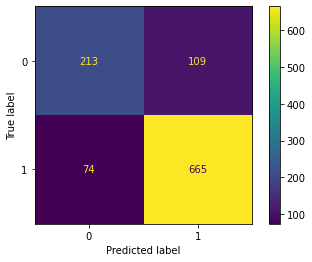

In [66]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456
 



C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


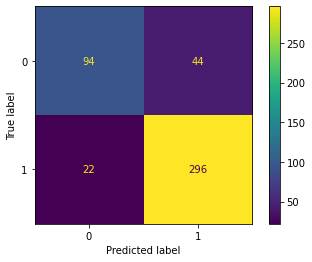

In [67]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC for the Training Data: 0.877
AUC for the Test Data: 0.913


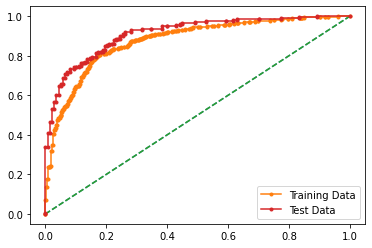

In [68]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,ytrain_predict_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,ytest_predict_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
log_testfpr, log_testtpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_testfpr, log_testtpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [ ]:
LDA

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection

In [20]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [71]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [72]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [73]:
pred_prob_train[:,1]


array([0.8790251 , 0.98828469, 0.38359105, ..., 0.98920521, 0.22969123,
       0.22989442])

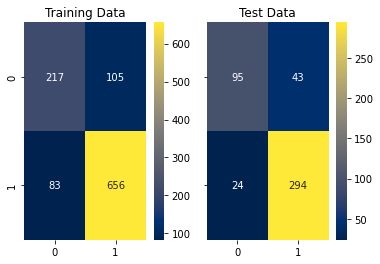

In [74]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='cividis',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='cividis',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [75]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456
 



In [76]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [32]:
pred_prob_train[:,1]

array([0.8790251 , 0.98828469, 0.38359105, ..., 0.98920521, 0.22969123,
       0.22989442])

AUC for the Training Data: 0.877
AUC for the Test Data: 0.914


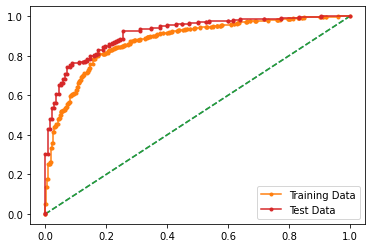

In [77]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
lda_testfpr, lda_testtpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_testfpr, lda_testtpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [65]:
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}

In [66]:
clf = LinearDiscriminantAnalysis()

In [68]:
grid_search1= GridSearchCV(estimator = clf, param_grid = lda_param_grid, cv = 3,n_jobs=-1,scoring='f1')

In [69]:
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd'], 'tol': [0.0001, 0.0002, 0.0003]},
             scoring='f1')

In [70]:
print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)


{'solver': 'svd', 'tol': 0.0001} 

LinearDiscriminantAnalysis()


In [71]:
best_model = grid_search1.best_estimator_

In [72]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [73]:
## Getting the probabilities on the train set

ytrain_predict_prob=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.120975,0.879025
1,0.011715,0.988285
2,0.616409,0.383591
3,0.134288,0.865712
4,0.077054,0.922946


In [74]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.165344,0.834656
1,0.658755,0.341245
2,0.075012,0.924988
3,0.019620,0.980380
4,0.118369,0.881631


              precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 



C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


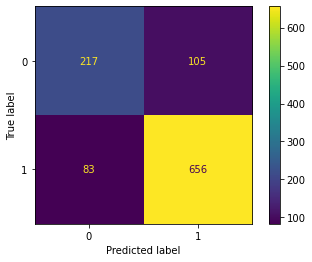

In [75]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456
 



C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


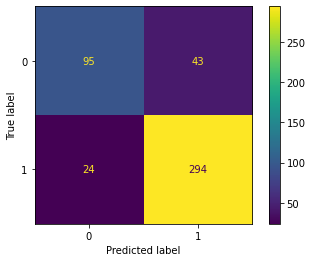

In [76]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC for the Training Data: 0.877
AUC for the Test Data: 0.914


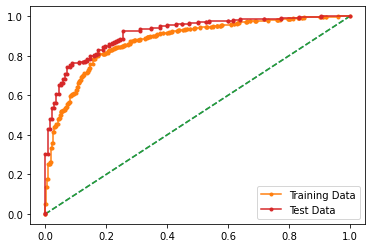

In [77]:
auc = metrics.roc_auc_score(y_train,ytrain_predict_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,ytest_predict_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
log_testfpr, log_testtpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_testfpr, log_testtpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

0.1 

Accuracy Score 0.7427
F1 Score 0.8427 

Confusion Matrix


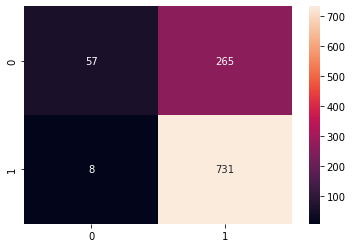

0.2 

Accuracy Score 0.7813
F1 Score 0.8606 

Confusion Matrix


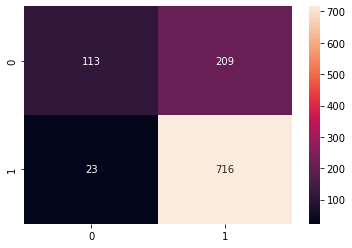

0.3 

Accuracy Score 0.8011
F1 Score 0.8687 

Confusion Matrix


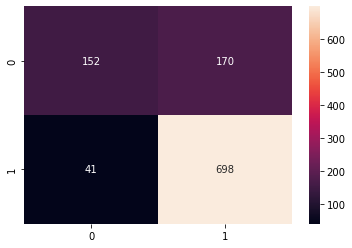

0.4 

Accuracy Score 0.819
F1 Score 0.8763 

Confusion Matrix


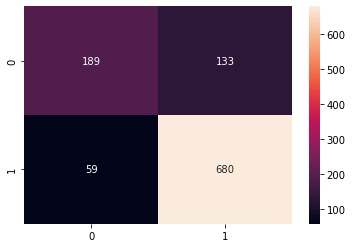

0.5 

Accuracy Score 0.8228
F1 Score 0.8747 

Confusion Matrix


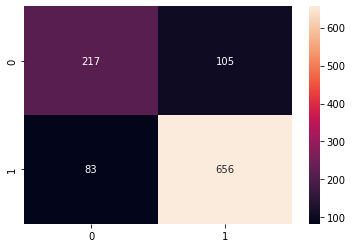

0.6 

Accuracy Score 0.82
F1 Score 0.8687 

Confusion Matrix


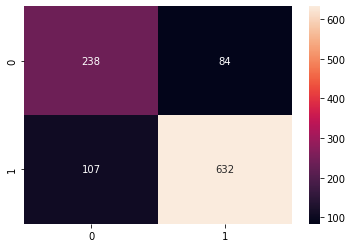

0.7 

Accuracy Score 0.8115
F1 Score 0.8565 

Confusion Matrix


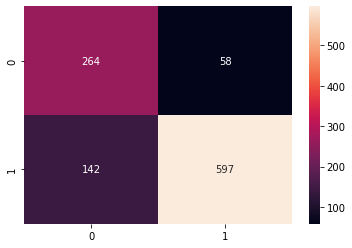

0.8 

Accuracy Score 0.7568
F1 Score 0.8028 

Confusion Matrix


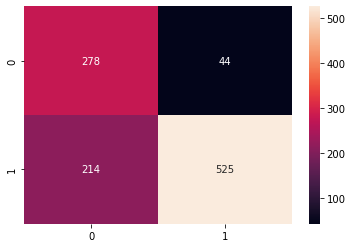

0.9 

Accuracy Score 0.6758
F1 Score 0.7099 

Confusion Matrix


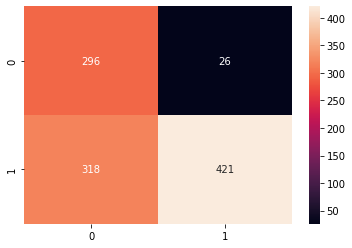

In [89]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [79]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)


GaussianNB()

In [79]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict)) 

0.8199811498586239
[[226  96]
 [ 95 644]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [81]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.8574561403508771
[[100  38]
 [ 27 291]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



In [82]:
NB_model.score(X_train, y_train)

0.8199811498586239

In [83]:
NB_model.score(X_test, y_test)

0.8574561403508771

In [84]:
# Training Data Probability Prediction
pred_prob_train_nb = NB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_nb = NB_model.predict_proba(X_test)

AUC for the Training Data: 0.873
AUC for the Test Data: 0.912


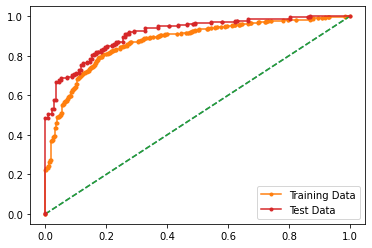

In [96]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train_nb[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_nb[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test_nb[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr_nb, tpr_nb, thresholds = metrics.roc_curve(y_test,pred_prob_test_nb[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_nb, tpr_nb, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [82]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [83]:
NB_model = GaussianNB()

In [84]:
grid_search = GridSearchCV(estimator = NB_model, param_grid = param_grid_nb, cv = 3,n_jobs=-1,scoring='f1')

In [85]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1')

In [86]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'var_smoothing': 0.01873817422860384} 

GaussianNB(var_smoothing=0.01873817422860384)


In [87]:
best_model = grid_search.best_estimator_

In [88]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [89]:
## Getting the probabilities on the train set

ytrain_predict_prob=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.122016,0.877984
1,0.000995,0.999005
2,0.710093,0.289907
3,0.097707,0.902293
4,0.098078,0.901922


In [90]:
## Getting the probabilities on the train set

ytrain_predict_prob=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.122016,0.877984
1,0.000995,0.999005
2,0.710093,0.289907
3,0.097707,0.902293
4,0.098078,0.901922


C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.78      1061
weighted avg       0.82      0.82      0.82      1061
 



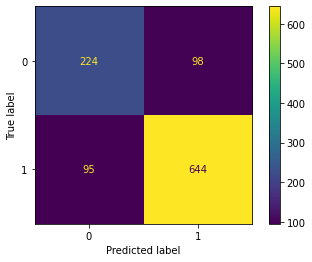

In [91]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456
 



C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


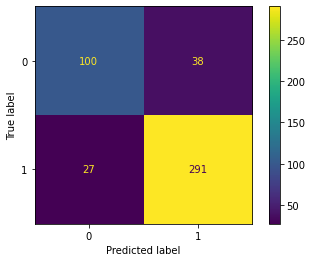

In [92]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC for the Training Data: 0.873
AUC for the Test Data: 0.914


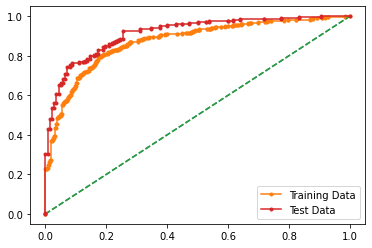

In [93]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,ytrain_predict_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,ytest_predict_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
log_testfpr, log_testtpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_testfpr, log_testtpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [86]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [87]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8633364750235627
[[242  80]
 [ 65 674]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       322
           1       0.89      0.91      0.90       739

    accuracy                           0.86      1061
   macro avg       0.84      0.83      0.84      1061
weighted avg       0.86      0.86      0.86      1061



In [103]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8421052631578947
[[100  38]
 [ 34 284]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       138
           1       0.88      0.89      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



In [ ]:
Default value n_neighbors=5, lets check the performance for K=7

In [22]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [88]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8633364750235627
[[242  80]
 [ 65 674]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       322
           1       0.89      0.91      0.90       739

    accuracy                           0.86      1061
   macro avg       0.84      0.83      0.84      1061
weighted avg       0.86      0.86      0.86      1061



In [89]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))


0.8421052631578947
[[100  38]
 [ 34 284]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       138
           1       0.88      0.89      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [90]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.19517543859649122,
 0.15131578947368418,
 0.1578947368421053,
 0.15131578947368418,
 0.14473684210526316,
 0.14254385964912286,
 0.13815789473684215,
 0.13815789473684215,
 0.14254385964912286,
 0.14473684210526316]

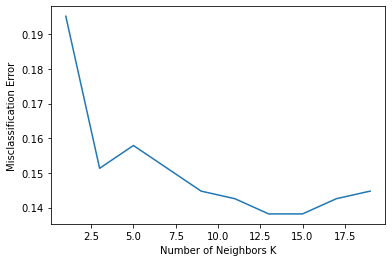

In [91]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
For K = 15 it is giving the best test accuracy lets check train and test for K=15 with other evaluation metrics

In [92]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [93]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8426013195098964
[[227  95]
 [ 72 667]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       322
           1       0.88      0.90      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [94]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8618421052631579
[[102  36]
 [ 27 291]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       138
           1       0.89      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.83      0.83       456
weighted avg       0.86      0.86      0.86       456



In [95]:
# Training Data Probability Prediction
pred_prob_train_KNN = KNN_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_KNN = KNN_model.predict_proba(X_test)

AUC for the Training Data: 0.902
AUC for the Test Data: 0.899


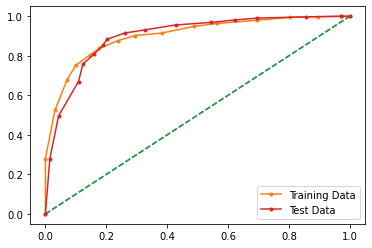

In [98]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train_KNN[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_KNN[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test_KNN[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
KNNfpr, KNNtpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_KNN[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNNfpr, KNNtpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

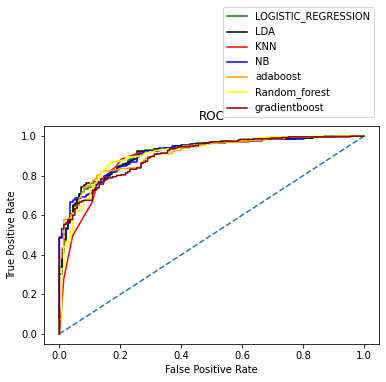

In [ ]:
As the difference between train and test accuracies is less than 10%, it is a valid model

In [ ]:
Ada Boost

In [34]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [35]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8491988689915174
[[228  94]
 [ 66 673]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       322
           1       0.88      0.91      0.89       739

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [36]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[ 95  43]
 [ 32 286]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       138
           1       0.87      0.90      0.88       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



In [37]:
# Training Data Probability Prediction
pred_prob_train_ADB = ADB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_ADB =ADB_model.predict_proba(X_test)

AUC for the Training Data: 0.904
AUC for the Test Data: 0.908


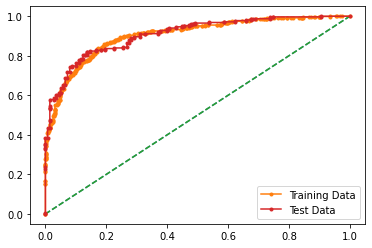

In [38]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train_ADB[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_ADB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test_ADB[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
_ADBfpr, _ADBtpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_ADB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(_ADBfpr, _ADBtpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [ ]:
Gradient Boosting

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)


In [ ]:
gbcl = gbcl.fit(X_train, y_train)

In [40]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.885956644674835
[[250  72]
 [ 49 690]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       322
           1       0.91      0.93      0.92       739

    accuracy                           0.89      1061
   macro avg       0.87      0.86      0.86      1061
weighted avg       0.88      0.89      0.88      1061



In [41]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8421052631578947
[[ 95  43]
 [ 29 289]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



In [43]:
# Training Data Probability Prediction
pred_prob_train_gbcl = gbcl.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_gbcl =gbcl.predict_proba(X_test)

AUC for the Training Data: 0.947
AUC for the Test Data: 0.904


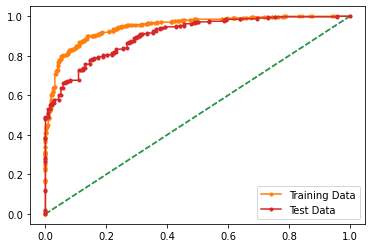

In [44]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train_gbcl[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test_gbcl[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
gbclfpr, gbcltpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbclfpr, gbcltpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [97]:
gb_param_grid = {
              'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01, 0.001],
              'max_depth': [4, 8,16],
              'min_samples_leaf': [100,150,250],
              'max_features': [0.3, 0.1]
              }

In [98]:
grid_search = GridSearchCV(estimator = gbcl, param_grid = gb_param_grid, cv = 3,n_jobs=-1,scoring='f1')

In [99]:
grid_search.fit(X_train, y_train)

C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01, 0.001],
                         'loss': ['deviance'], 'max_depth': [4, 8, 16],
                         'max_features': [0.3, 0.1],
                         'min_samples_leaf': [100, 150, 250],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [100]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 150, 'n_estimators': 200} 

GradientBoostingClassifier(learning_rate=0.05, loss='deviance', max_depth=4,
                           max_features=0.3, min_samples_leaf=150,
                           n_estimators=200, random_state=1)


In [101]:
best_model = grid_search.best_estimator_

In [102]:
best_model

GradientBoostingClassifier(learning_rate=0.05, loss='deviance', max_depth=4,
                           max_features=0.3, min_samples_leaf=150,
                           n_estimators=200, random_state=1)

In [103]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [104]:
## Getting the probabilities on the train set

ytrain_predict_prob=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.099327,0.900673
1,0.006970,0.993030
2,0.536781,0.463219
3,0.148296,0.851704
4,0.227118,0.772882


In [105]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.168484,0.831516
1,0.572200,0.427800
2,0.168911,0.831089
3,0.037099,0.962901
4,0.191033,0.808967


C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.76      0.70      0.73       322
           1       0.88      0.90      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061
 



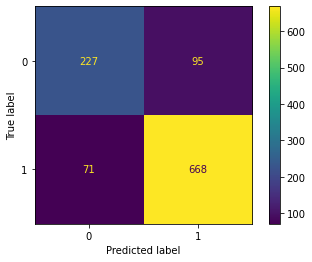

In [106]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.85      0.86      0.86       456
 



C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


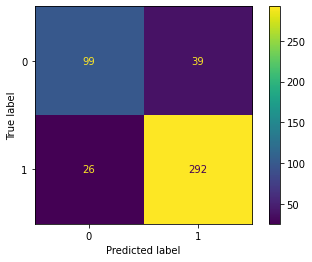

In [108]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC for the Training Data: 0.904
AUC for the Test Data: 0.917


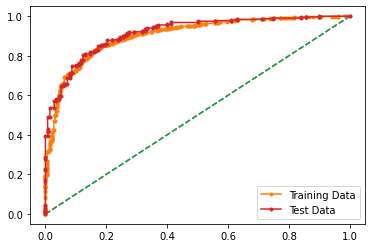

In [109]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,ytrain_predict_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,ytest_predict_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
log_testfpr, log_testtpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_testfpr, log_testtpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [ ]:
Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [48]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[322   0]
 [  0 739]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [49]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8421052631578947
[[ 95  43]
 [ 29 289]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



In [ ]:
Bagging

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
cart = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [53]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9679547596606974
[[299  23]
 [ 11 728]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       322
           1       0.97      0.99      0.98       739

    accuracy                           0.97      1061
   macro avg       0.97      0.96      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [54]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8530701754385965
[[ 95  43]
 [ 24 294]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



In [55]:
# Training Data Probability Prediction
pred_prob_train_RF = Bagging_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_RF =Bagging_model.predict_proba(X_test)

AUC for the Training Data: 0.997
AUC for the Test Data: 0.910


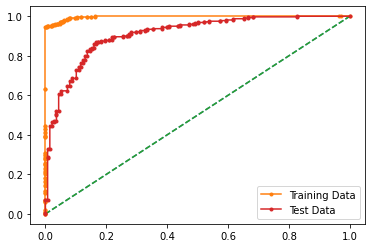

In [56]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train_RF[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_RF[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test_RF[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
RFfpr, RFtpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_RF[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RFfpr, RFtpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

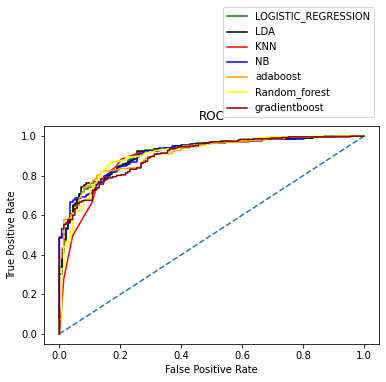

In [104]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_testfpr,log_testtpr,color='green',label="LOGISTIC_REGRESSION")
plt.plot(lda_testfpr,lda_testtpr,color='black',label="LDA")
plt.plot(KNNfpr,KNNtpr,color='red',label="KNN")
plt.plot(fpr_nb,tpr_nb,color='blue',label="NB")
plt.plot(_ADBfpr,_ADBtpr,color='orange',label="adaboost")
plt.plot(RFfpr,RFtpr,color='yellow',label="Random_forest")
plt.plot(gbclfpr,gbcltpr,color='maroon',label="gradientboost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [ ]:
smote

In [30]:
!pip install imbalanced-learn

In [28]:
from imblearn.over_sampling import SMOTE

In [ ]:
SMOTE is only applied on the train data set

In [33]:
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [34]:
X_train_res.shape

(1478, 8)

In [ ]:
Naive Bayes with SMOTE

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [36]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [37]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8308525033829499
[[611 128]
 [122 617]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       739
           1       0.83      0.83      0.83       739

    accuracy                           0.83      1478
   macro avg       0.83      0.83      0.83      1478
weighted avg       0.83      0.83      0.83      1478



In [38]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8245614035087719
[[107  31]
 [ 49 269]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       138
           1       0.90      0.85      0.87       318

    accuracy                           0.82       456
   macro avg       0.79      0.81      0.80       456
weighted avg       0.83      0.82      0.83       456



In [ ]:
KNN With SMOTE

In [39]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [40]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8863328822733424
[[705  34]
 [134 605]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       739
           1       0.95      0.82      0.88       739

    accuracy                           0.89      1478
   macro avg       0.89      0.89      0.89      1478
weighted avg       0.89      0.89      0.89      1478



In [41]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7807017543859649
[[110  28]
 [ 72 246]]
              precision    recall  f1-score   support

           0       0.60      0.80      0.69       138
           1       0.90      0.77      0.83       318

    accuracy                           0.78       456
   macro avg       0.75      0.79      0.76       456
weighted avg       0.81      0.78      0.79       456



In [ ]:
Cross Validation on Naive Bayes Model

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.81756757, 0.77027027, 0.7972973 , 0.77702703, 0.85135135,
       0.83783784, 0.80405405, 0.82432432, 0.86394558, 0.91156463])

In [43]:
scores = cross_val_score(NB_SM_model, X_test, y_test, cv=10)
scores

array([0.86956522, 0.84782609, 0.89130435, 0.7826087 , 0.82608696,
       0.73913043, 0.77777778, 0.88888889, 0.88888889, 0.91111111])

In [44]:
## After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. 
## Hence our model is valid.
## Students are advised to perform CV on other models and compare the results.